In [1]:
from heron import data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/home/daniel/.virtualenvs/heron/local/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
concrete = np.genfromtxt("../data/concrete.csv", delimiter=" ,")

In [3]:
concrete = data.Data(concrete[:, :-1], concrete[:,-1],              
                     target_names = ["Cement", "Slag", "Fly Ash", "Water", "Superplasticiser", "Coarse Agg", "Fine Ag", "Age"],
                      label_names = ["Strength"]   )

In [4]:
from heron import corner

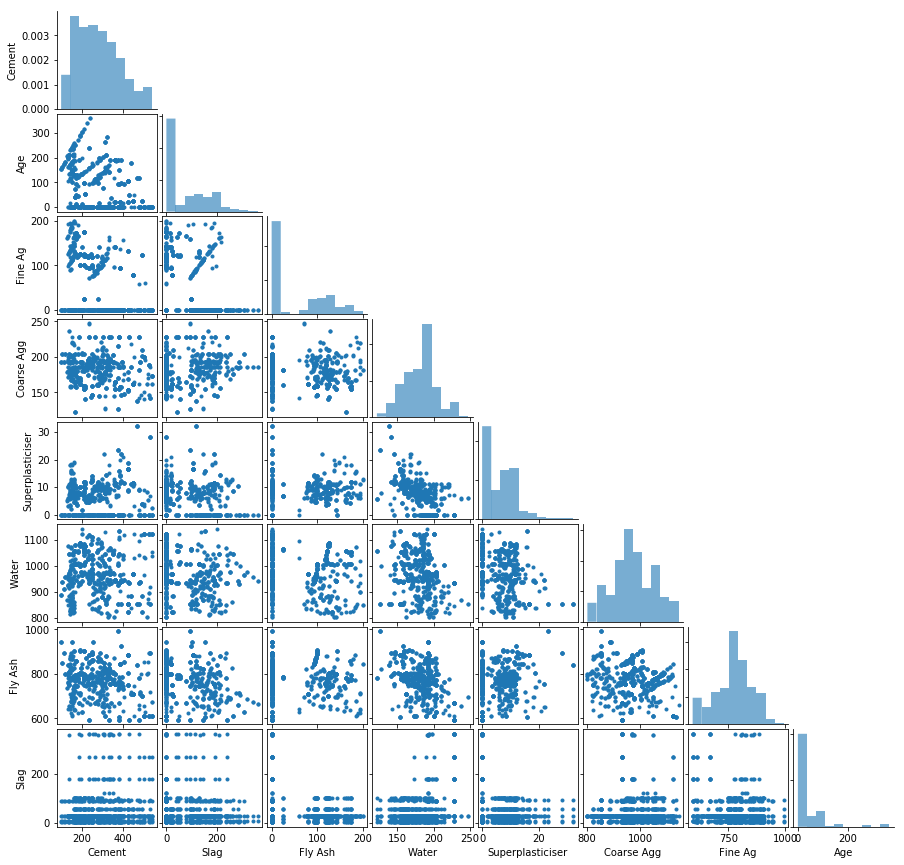

In [5]:
corner.corner(concrete, figsize=(15,15))

In [6]:
from heron import regression
from heron import kernels

In [88]:
gp = regression.Regressor(concrete, kernel=kernels.SquaredExponential(ndim=8))

In [8]:
new_point = np.atleast_2d([0.1]*8)

In [9]:
new_point = np.atleast_2d(gp.training_data[1])
new_point[0,1]+=0.1

In [10]:
gp.prediction(new_point)

(array([ 22.50255699]), array([[-5915.86957992]]))

In [11]:
gp.set_hyperparameters([.1]*9)

-4873193.3506191447

In [12]:
gp.grad_loglikelihood()

/home/daniel/.virtualenvs/heron/local/lib/python2.7/site-packages/heron-0.1.0-py2.7.egg/heron/kernels.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


array([  8.38853822e+11,   4.35693033e+09,   6.03307297e+08,
         2.05486689e+08,   1.67113775e+09,   3.47139647e+09,
         3.81652237e+08,   2.89236724e+09,   3.78093762e+10])

In [13]:
from scipy.optimize import minimize

In [14]:
def nll(p):
    gp.set_hyperparameters(p)
    ll = gp.loglikelihood()
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    gp.set_hyperparameters(p)
    return -gp.grad_loglikelihood()

In [21]:
x

(100, 81)

In [40]:
i = 0
x0 = [1]*9
x = np.tile(x0, (100,1))
x[:,i] = np.linspace(8000,10000,100)
y = map(nll, x)

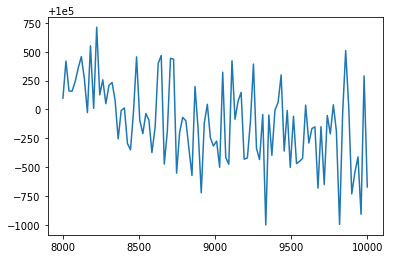

In [41]:
plt.plot(x[:,0], y)

In [42]:
x0 = [0.9]*9
x0[0] = 10000
res = minimize(nll, x0, method='BFGS', jac=grad_nll ,options={'disp': True})

         Current function value: 92851.317942
         Iterations: 6
         Function evaluations: 102
         Gradient evaluations: 90


In [43]:
gp.kernel.hyper

[10000.00028216264,
 [array([ 7.2702602 ,  1.45536817,  2.87121428,  0.54805988,  1.63338349,
         -1.15301731,  5.34217822,  1.93199765])]]

In [18]:
new_point = np.tile(new_point, (100,1))

In [19]:
new_point[:,1] = np.linspace(0,1,100)

In [20]:
pred = gp.prediction(new_point)

In [34]:
np.diag(pred[1])

array([  4.39813802e-08,   4.35864384e-08,   4.33540167e-08, ...,
         8.74325664e-07,   8.99656529e-07,   9.25622963e-07])

In [85]:
x

array([   1.        ,    4.67676768,    8.35353535,   12.03030303,
         15.70707071,   19.38383838,   23.06060606,   26.73737374,
         30.41414141,   34.09090909,   37.76767677,   41.44444444,
         45.12121212,   48.7979798 ,   52.47474747,   56.15151515,
         59.82828283,   63.50505051,   67.18181818,   70.85858586,
         74.53535354,   78.21212121,   81.88888889,   85.56565657,
         89.24242424,   92.91919192,   96.5959596 ,  100.27272727,
        103.94949495,  107.62626263,  111.3030303 ,  114.97979798,
        118.65656566,  122.33333333,  126.01010101,  129.68686869,
        133.36363636,  137.04040404,  140.71717172,  144.39393939,
        148.07070707,  151.74747475,  155.42424242,  159.1010101 ,
        162.77777778,  166.45454545,  170.13131313,  173.80808081,
        177.48484848,  181.16161616,  184.83838384,  188.51515152,
        192.19191919,  195.86868687,  199.54545455,  203.22222222,
        206.8989899 ,  210.57575758,  214.25252525,  217.92929

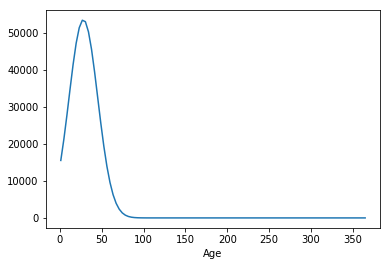

In [89]:
h = gp.kernel.hyper
h[0] = 3000
#gp.set_hyperparameters(h)
i = 7
new_point = np.atleast_2d(gp.training_data[1])
new_point = np.tile(new_point, (100,1))
new_point[:,i] = np.linspace(0,1,100)
pred = gp.prediction(new_point)
x = gp.training_object.denormalise(new_point, gp.training_object.targets_scale)[:,i]
plt.plot(x, pred[0])
plt.xlabel(gp.training_object.target_names[i])
err = np.diag(pred[1])
#plt.fill_between(x, pred[0] - err, pred[0] + err)

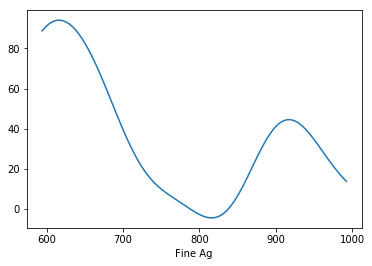

In [62]:
i = 6
new_point = np.atleast_2d(gp.training_data[1])
new_point = np.tile(new_point, (100,1))
new_point[:,i] = np.linspace(0,1,100)
pred = gp.prediction(new_point)
x = gp.training_object.denormalise(new_point, gp.training_object.targets_scale)[:,i]
plt.plot(x, pred[0])
plt.xlabel(gp.training_object.target_names[i])
err = np.diag(pred[1])
#plt.fill_between(x, pred[0] - err, pred[0] + err)

In [70]:
h = gp.kernel.hyper
h[0] = 9000
gp.set_hyperparameters(h)

gp.loglikelihood()

-93597.180700147743

In [47]:
gp.training_object.targets_scale

(array([ 102. ,    0. ,    0. ,  121.8,    0. ,  801. ,  594. ,    1. ]),
 array([ 438. ,  359.4,  200.1,  125.2,   32.2,  344. ,  398.6,  364. ]))

In [24]:
gp.set_hyperparameters([5]*9)
gp.loglikelihood()

-89941.002666408676

In [29]:
import emcee

In [30]:
ndim = 9
burn = 10
nwalkers = 100
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

In [32]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, gp.set_hyperparameters, args=[])
# Run the burn-in
pos, prob, state = sampler.run_mcmc(p0, burn)

In [18]:
def nll(p):
    gp.set_hyperparameters(p)
    ll = gp.loglikelihood()
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    gp.set_hyperparameters(p)
    return -gp.grad_lnlikelihood(y, quiet=True)

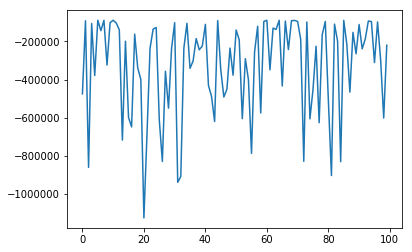

In [37]:
plt.plot(prob)

In [38]:
gp.loglikelihood()

-219719.59704498551

In [39]:
pos[-1]

array([ 0.49244046,  2.73157503,  0.58098634,  0.52088189, -3.03855323,
        2.96034444,  1.05788286, -0.11021227,  2.89234684])

In [40]:
np.exp(0)

1.0